# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: October 23, 2025 by 5:59pm**


## The MovieLens data sets


http://grouplens.org/datasets/movielens/



In [17]:
from IPython.lib.display import YouTubeVideo

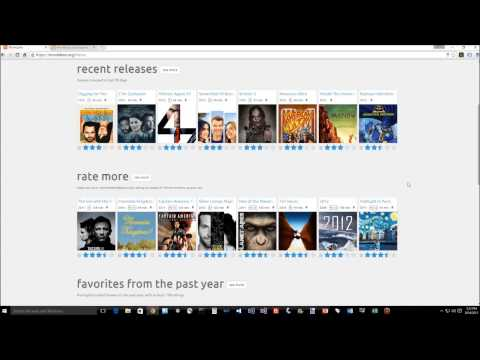

In [18]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:**

Please EDIT this cell and add the names of all the team members in your team:

    1. Fatemeh Dana
    
    2. Kofi Gyimah Amoako-Gyimah
    
    3. Spencer Dill

 **Give your group a name**. For example: ***Data Detectives***

**Please note that there will be a survey after the case study, where you will have to answer questions about other group members’ contributions anonymously.**

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:**
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!




# Problem 1 (20 points total):

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [19]:
import pandas as pd
#Fatemeh
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
# movielens_1m_case_study.py
# Python 3.10+ recommended

import os

import numpy as np

#step 1 => Download the data, merge them into one DataFrame, and save as HDF5

#Data paths
USERS_FP   =  "users.dat"
RATINGS_FP = "ratings.dat"
MOVIES_FP  = "movies.dat"
H5_OUT     = "movielens_1m_clean.h5"

# base_url = "https://github.com/SpencerDill232/Case_Study_3.git"
# base_url = "https://raw.githubusercontent.com/SpencerDill232/Case_Study_3/blob/main/"
base_url =   "https://raw.githubusercontent.com/SpencerDill232/Case_Study_3/main/"
files = {
    USERS_FP: base_url + "users.dat",
    RATINGS_FP: base_url + "ratings.dat",
    MOVIES_FP: base_url + "movies.dat"
}

import urllib.request
def download(url, dest):
    try:
        print(f"Downloading {dest} ...")
        urllib.request.urlretrieve(url, dest)
        # quick sanity check: non-empty file?
        if os.path.getsize(dest) == 0:
            raise RuntimeError("Downloaded file is empty.")
        print(f"✓ Saved {dest}")
    except Exception as e:
        if os.path.exists(dest):
            try: os.remove(dest)
            except: pass
        raise RuntimeError(f"Failed to fetch {url} -> {dest}\n{e}")

for filename, url in files.items():
    if not os.path.exists(filename):
        download(url, filename)
    else:
        print(f"{filename} already exists — skipping.")



# for filename, url in files.items():
#     if not os.path.exists(filename):
#         print(f"Downloading {filename} from GitHub...")
#         os.system(f"wget -q {url}")
#     else:
#         print(f"{filename} already exists — skipping download.")

# Load raw data
users = pd.read_csv(
    USERS_FP, sep="::", engine="python",
    names=["user_id","gender","age_code","occupation","zip"],
    dtype={"user_id":int, "gender":"category", "age_code":int, "occupation":int, "zip":"string"}
)

ratings = pd.read_csv(
    RATINGS_FP, sep="::", engine="python",
    names=["user_id","movie_id","rating","timestamp"],
    dtype={"user_id":int, "movie_id":int, "rating":np.int8, "timestamp":np.int64}
)
movies = pd.read_csv(
    MOVIES_FP, sep="::", engine="python",
    names=["movie_id", "title", "genres"],
    dtype={"movie_id": int, "title": "string", "genres": "string"},
    encoding="latin-1"
    # encoding_errors="ignore"   # skips bad bytes
)

# movies = pd.read_csv(
#     MOVIES_FP, sep="::", engine="python",
#     names=["movie_id","title","genres"],
#     dtype={"movie_id":int, "title":"string", "genres":"string"}
# )


# Merge to one DataFrame
df = ratings.merge(users, on="user_id", how="left").merge(movies, on="movie_id", how="left")

# cleanup -> fill missing data
df["genres"] = df["genres"].fillna("(no genre listed)")
df["title"]  = df["title"].fillna("(untitled)")

# Convert 'string' columns to plain Python objects (for HDF5 compatibility)
for data in [users, ratings, movies, df]:
    for col in data.select_dtypes(include="string").columns:
        data[col] = data[col].astype("object")

# Store to HDF5
with pd.HDFStore(H5_OUT, mode="w") as store:
    store.put("users", users, format="table")
    store.put("ratings", ratings, format="table")
    store.put("movies", movies, format="table")
    store.put("ratings_merged", df, format="table")

print(f"Saved data to {H5_OUT}")




users.dat already exists — skipping.
ratings.dat already exists — skipping.
movies.dat already exists — skipping.
Saved data to movielens_1m_clean.h5


In [20]:
# #justo to make sure the data is saved correctly
# import pandas as pd
# p_h5 = "movielens_1m_clean.h5"
# with pd.HDFStore(p_h5) as store:
#     keys = store.keys()
#     print('HDF5 keys:')
#     # for k in keys:
#     #     print('  ', k)
#     for k in keys:
#         print('\n---', k, '---')
#         try:
#             # try to get a small sample
#             df = store.get(k)
#             print('shape:', getattr(df, 'shape', 'unknown'))
#             print(df.head(3).to_string(index=False))
#         except Exception as e:
#             print('Could not read', k, ':', e)


In [21]:
# counter_age = users['age_code'].tolist()
# from collections import Counter
# array_age = Counter(counter_age)
# sorted_age = dict(sorted(array_age.items(), key=lambda x: x[0], reverse=True))
# print(sorted_age)
# print(array_age)


# gender = users['gender'].tolist()
# from collections import Counter
# array_gender = Counter(gender)
# print(array_gender)

In [22]:
import pandas as pd
import os
import numpy as np

#age_code is like: {1, 18, 25, 35, 45, 50, 56} in ML-1M -> we'll map to human-friendly bands
AGE_MAP = {
    1:  "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+",
}
df["age_band"] = df["age_code"].map(AGE_MAP).astype("category")
mask_over30 = df["age_code"] >= 30




# How many movies have an average rating > 4.5 overall?
movie_mean = df.groupby("movie_id")["rating"].mean()
count_overall_avg_gt_45 = (movie_mean > 4.5).sum()
print(count_overall_avg_gt_45, "movies have overall average rating > 4.5")

# Q2: How many movies have an average rating > 4.5 among men? Among women?
# movie_mean_by_gender = df.groupby(["movie_id","gender"])["rating"].mean().unstack("gender")
movie_mean_by_gender = (
    df.groupby(["movie_id", "gender"], observed=True)["rating"]
      .mean()
      .unstack("gender")
)
count_avg_gt_45_men   = (movie_mean_by_gender.get("M", pd.Series(index=movie_mean.index)) > 4.5).sum()
count_avg_gt_45_women = (movie_mean_by_gender.get("F", pd.Series(index=movie_mean.index)) > 4.5).sum()
print(count_avg_gt_45_men, "movies have average rating > 4.5 among men")
print(count_avg_gt_45_women, "movies have average rating >  4.5 among women")


# Q3: How many movies have a median rating > 4.5 among men > 30? women > 30?


df_over30 = df[mask_over30]
# movie_median_by_gender_over30 = df_over30.groupby(["movie_id","gender"])["rating"].median().unstack("gender")
movie_median_by_gender_over30 = (
    df_over30.groupby(["movie_id", "gender"], observed=True)["rating"]
      .median()
      .unstack("gender")
)
count_median_gt_45_m_over30 = (movie_median_by_gender_over30.get("M", pd.Series(index=movie_mean.index)) > 4.5).sum()
count_median_gt_45_f_over30 = (movie_median_by_gender_over30.get("F", pd.Series(index=movie_mean.index)) > 4.5).sum()

print(f"Movies with median rating > 4.5 among men >30:   {count_median_gt_45_m_over30}")
print(f"Movies with median rating > 4.5 among women >30: {count_median_gt_45_f_over30}")


# the 10 most popular movies
# We defined popularity in one way: By how many people rated the movie


movies_info = df.groupby("movie_id").agg(
    n_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    title=("title", "first")
).reset_index()


print("Top 10 most rated movies:")

# Get top 10 by average rating
top10_by_rating = movies_info.sort_values("avg_rating", ascending=False).head(10)
print(top10_by_rating[["title", "n_ratings", "avg_rating"]].to_string(index=False))

# Get top 10 by number of ratings
top10_by_count = movies_info.sort_values("n_ratings", ascending=False).head(10)
print(top10_by_count[["title", "n_ratings", "avg_rating"]].to_string(index=False))


# Calculate Bayesian average
C = df["rating"].mean()
m = 50
movies_info["bayes_score"] = (movies_info["n_ratings"]/(movies_info["n_ratings"]+m))*movies_info["avg_rating"] + (m/(movies_info["n_ratings"]+m))*C
top10_bayesian = movies_info.sort_values("bayes_score", ascending=False).head(10)
print(top10_bayesian[["title", "n_ratings", "avg_rating", "bayes_score"]].to_string(index=False))

21 movies have overall average rating > 4.5
23 movies have average rating > 4.5 among men
51 movies have average rating >  4.5 among women
Movies with median rating > 4.5 among men >30:   86
Movies with median rating > 4.5 among women >30: 149
Top 10 most rated movies:
                                    title  n_ratings  avg_rating
                         Baby, The (1973)          1         5.0
                   Song of Freedom (1936)          1         5.0
                  Ulysses (Ulisse) (1954)          1         5.0
                     Smashing Time (1967)          2         5.0
       Gate of Heavenly Peace, The (1995)          3         5.0
                  Follow the Bitch (1998)          1         5.0
Schlafes Bruder (Brother of Sleep) (1995)          1         5.0
                             Lured (1947)          1         5.0
                 One Little Indian (1973)          1         5.0
                 Bittersweet Motel (2000)          1         5.0
               

In [23]:
# ---------------------------------------------------
# Check which group of users tends to give higher ratings
# I'll measure this by:
#   - average rating
#   - % of 5-star ratings
#   - % of ratings >= 4
# ---------------------------------------------------
def group_summary(data, group_cols):
    temp = data.copy()
    temp["is_five"] = temp["rating"] == 5
    temp["is_fourplus"] = temp["rating"] >= 4

    result = temp.groupby(group_cols, observed=True).agg(
        mean_rating=("rating", "mean"),
        pct_five=("is_five", "mean"),
        pct_fourplus=("is_fourplus", "mean"),
        n_ratings=("rating", "count")
    ).reset_index()

    return result.sort_values("mean_rating", ascending=False)

# def group_summary(data, group_cols):
#     temp = data.copy()
#     temp["is_five"] = temp["rating"] == 5
#     temp["is_fourplus"] = temp["rating"] >= 4
#     result = temp.groupby(group_cols).agg(
#         mean_rating=("rating", "mean"),
#         pct_five=("is_five", "mean"),
#         pct_fourplus=("is_fourplus", "mean"),
#         n_ratings=("rating", "count")
#     ).reset_index()
#     return result.sort_values("mean_rating", ascending=False)

print("Average generosity by age group:")
gen_age = group_summary(df, ["age_code"])
print(gen_age.to_string(index=False))

print("Average generosity by gender:")
gen_gender = group_summary(df, ["gender"])
print(gen_gender.to_string(index=False))

print("Average generosity by age group and gender:")
gen_age_gender = group_summary(df, ["age_code", "gender"])
print(gen_age_gender.to_string(index=False))

# import matplotlib as plt




Average generosity by age group:
 age_code  mean_rating  pct_five  pct_fourplus  n_ratings
       56     3.766632  0.277669      0.646338      38780
       50     3.714512  0.256587      0.621934      72490
       45     3.638062  0.228881      0.591585      83633
       35     3.618162  0.224670      0.586388     199003
        1     3.549520  0.249972      0.573665      27211
       25     3.545235  0.216733      0.562636     395556
       18     3.507573  0.220981      0.549206     183536
Average generosity by gender:
gender  mean_rating  pct_five  pct_fourplus  n_ratings
     F     3.620366  0.237567      0.590728     246440
     M     3.568879  0.222567      0.570071     753769
Average generosity by age group and gender:
 age_code gender  mean_rating  pct_five  pct_fourplus  n_ratings
       56      F     3.915534  0.336450      0.706381       9199
       50      F     3.797110  0.281001      0.655171      18064
       56      M     3.720327  0.259389      0.627666      29581
    

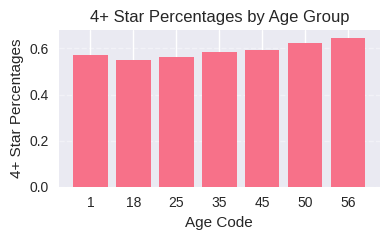

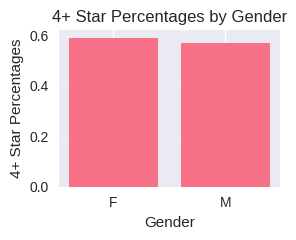

/tmp/ipython-input-3031235263.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index="age_code", columns="gender",


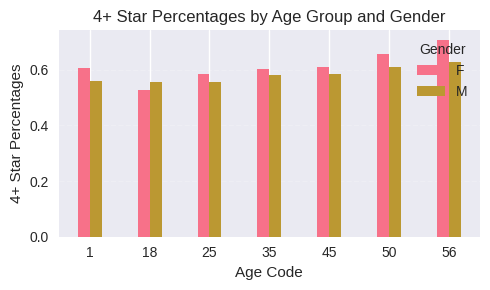

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1) Mean rating by age_code ----------
# Sort by age_code numerically so the x-axis is logical
gen_age_sorted = gen_age.sort_values("age_code")

plt.figure(figsize=(4,2.5))
plt.bar(gen_age_sorted["age_code"].astype(str), gen_age_sorted["pct_fourplus"])
plt.title("4+ Star Percentages by Age Group")
plt.xlabel("Age Code")
plt.ylabel("4+ Star Percentages")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# (Optional) swap 'mean_rating' for 'pct_five' or 'pct_fourplus' to view percentages:
# plt.bar(gen_age_sorted["age_code"].astype(str), gen_age_sorted["pct_five"])

# ---------- 2) Mean rating by gender ----------
# Put F, M in a stable order if present
gender_order = [g for g in ["F", "M"] if g in set(gen_gender["gender"])]
gen_gender_sorted = gen_gender.set_index("gender").loc[gender_order].reset_index()

plt.figure(figsize=(3,2.5))
plt.bar(gen_gender_sorted["gender"], gen_gender_sorted["pct_fourplus"])
plt.title("4+ Star Percentages by Gender")
plt.xlabel("Gender")
plt.ylabel("4+ Star Percentages")
plt.grid(axis="y", linestyle="--", alpha=0.2)
plt.tight_layout()
plt.show()

# ---------- 3) Grouped bars: age_code × gender (mean_rating) ----------
# Pivot to F/M columns and ensure ascending ages
pivot = (gen_age_gender
         .pivot_table(index="age_code", columns="gender",
                      values="pct_fourplus", aggfunc="mean"))
# Keep only F/M cols if they exist
cols = [c for c in ["F", "M"] if c in pivot.columns]
pivot = pivot[cols].sort_index()

x = np.arange(len(pivot.index))
width = 0.2

plt.figure(figsize=(5,3))
for i, col in enumerate(cols):
    plt.bar(x + (i - (len(cols)-1)/2)*width, pivot[col].values, width, label=col)

plt.title("4+ Star Percentages by Age Group and Gender")
plt.xlabel("Age Code")
plt.ylabel("4+ Star Percentages")
plt.xticks(x, [str(a) for a in pivot.index])
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.2)
plt.tight_layout()
plt.show()


# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

/tmp/ipython-input-2101428114.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_stats = movies_summary.groupby('popularity').agg({


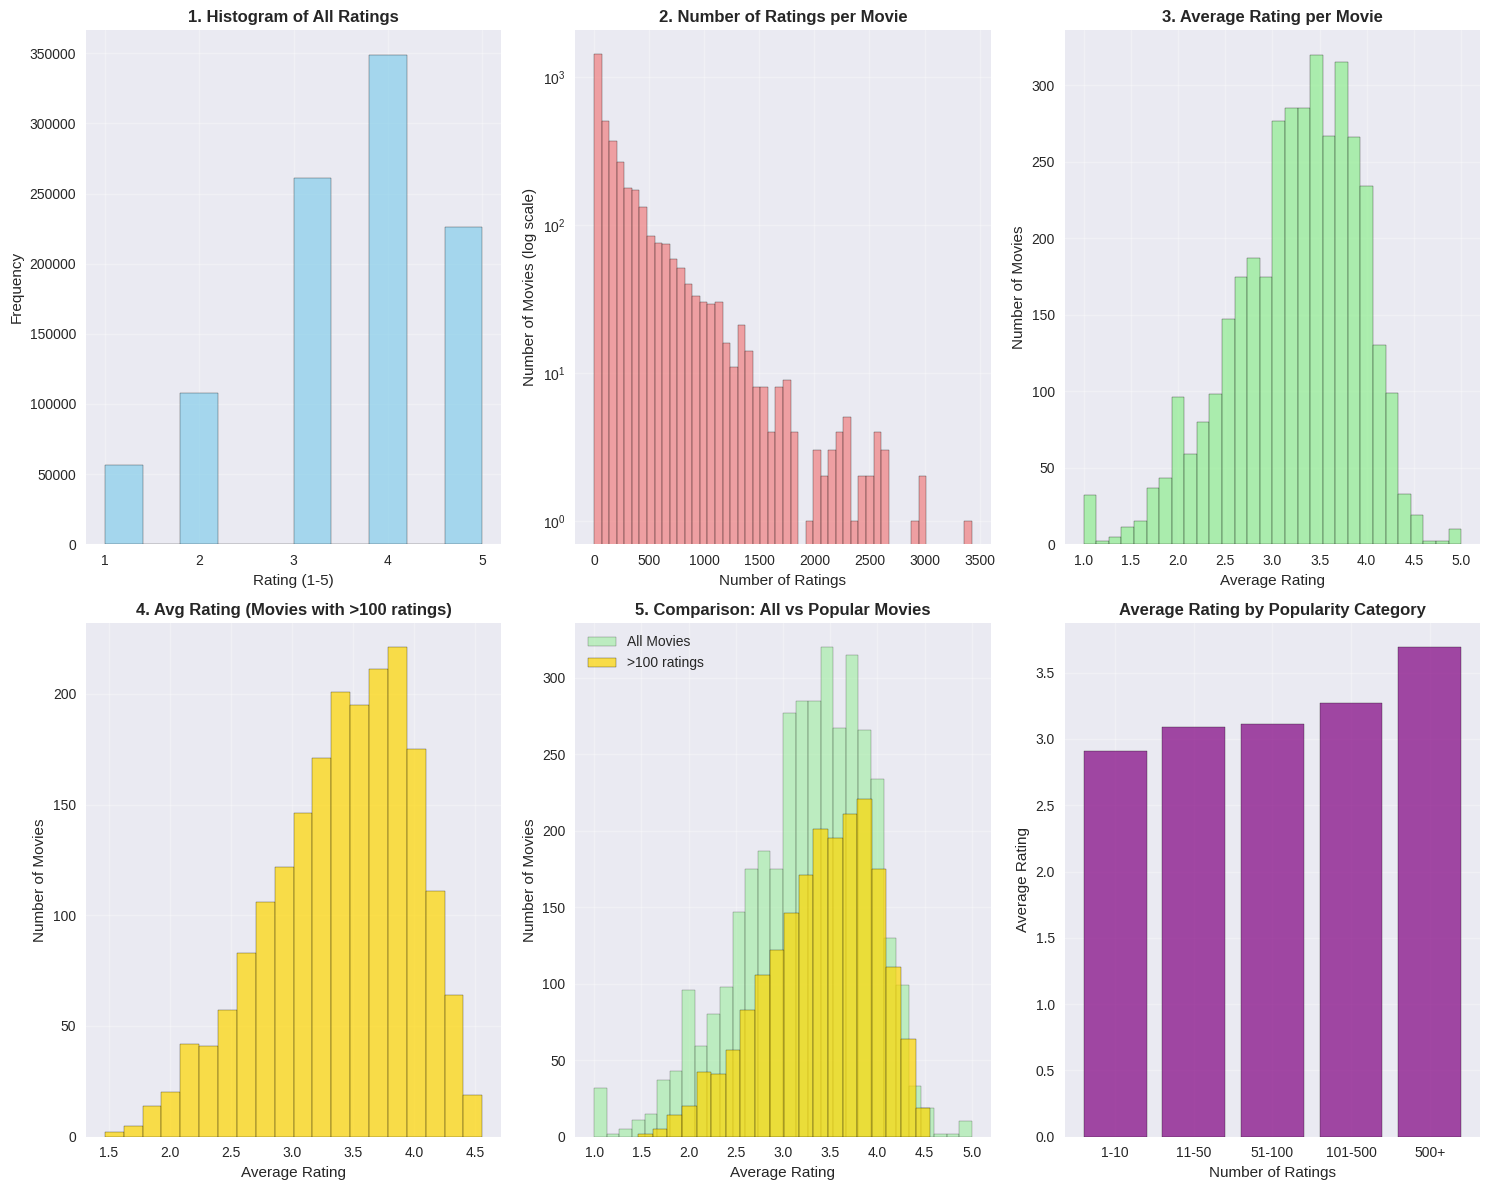


DETAILED ANALYSIS OF RATING DISTRIBUTIONS

Overall Statistics:
Total ratings: 1,000,209
Total movies: 3,706
Average rating across all ratings: 3.582

Movies with >100 ratings:
Number of movies: 2,006
Average of average ratings: 3.402
Standard deviation: 0.578

Extreme ratings analysis:
Movies with avg rating = 5.0 (all movies): 10
Movies with avg rating = 5.0 (>100 ratings): 0
Movies with avg rating = 1.0 (all movies): 31
Movies with avg rating = 1.0 (>100 ratings): 0

Popularity Statistics:
           avg_rating              n_ratings
                 mean    std count      mean
popularity                                  
1-10            2.912  0.937   473     4.101
11-50           3.090  0.606   734    28.856
51-100          3.113  0.632   493    73.355
101-500         3.273  0.589  1389   249.613
500+            3.691  0.428   617   963.066


In [25]:
#Kofi
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#Kofi
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Histogram of the ratings of all movies
plt.figure(figsize=(15, 12))

# Plot 1: Histogram of all ratings
plt.subplot(2, 3, 1)
plt.hist(df['rating'], bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('1. Histogram of All Ratings', fontsize=12, fontweight='bold')
plt.xlabel('Rating (1-5)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))

# 2. Histogram of number of ratings per movie
plt.subplot(2, 3, 2)
ratings_per_movie = df.groupby('movie_id')['rating'].count()
plt.hist(ratings_per_movie, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('2. Number of Ratings per Movie', fontsize=12, fontweight='bold')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
# Log scale might be helpful due to long tail
plt.yscale('log')
plt.ylabel('Number of Movies (log scale)')

# 3. Histogram of average rating for each movie
plt.subplot(2, 3, 3)
avg_ratings = df.groupby('movie_id')['rating'].mean()
plt.hist(avg_ratings, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('3. Average Rating per Movie', fontsize=12, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)

# 4. Histogram of average rating for movies rated > 100 times
plt.subplot(2, 3, 4)
popular_movies = ratings_per_movie[ratings_per_movie > 100]
avg_ratings_popular = avg_ratings[popular_movies.index]
plt.hist(avg_ratings_popular, bins=20, edgecolor='black', alpha=0.7, color='gold')
plt.title('4. Avg Rating (Movies with >100 ratings)', fontsize=12, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)

# 5. Comparison: All movies vs popular movies
plt.subplot(2, 3, 5)
plt.hist(avg_ratings, bins=30, alpha=0.5, label='All Movies', edgecolor='black', color='lightgreen')
plt.hist(avg_ratings_popular, bins=20, alpha=0.7, label='>100 ratings', edgecolor='black', color='gold')
plt.title('5. Comparison: All vs Popular Movies', fontsize=12, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Detailed analysis of rating patterns by popularity
plt.subplot(2, 3, 6)
# Create popularity categories
movies_summary = pd.DataFrame({
    'n_ratings': ratings_per_movie,
    'avg_rating': avg_ratings
})
movies_summary['popularity'] = pd.cut(movies_summary['n_ratings'],
                                     bins=[0, 10, 50, 100, 500, 10000],
                                     labels=['1-10', '11-50', '51-100', '101-500', '500+'])

# Calculate stats by popularity
popularity_stats = movies_summary.groupby('popularity').agg({
    'avg_rating': ['mean', 'std', 'count'],
    'n_ratings': 'mean'
}).round(3)

# Plot average rating by popularity category
popularity_stats.index = popularity_stats.index.astype(str)
plt.bar(popularity_stats.index, popularity_stats[('avg_rating', 'mean')],
        color='purple', alpha=0.7, edgecolor='black')
plt.title('Average Rating by Popularity Category', fontsize=12, fontweight='bold')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n" + "="*80)
print("DETAILED ANALYSIS OF RATING DISTRIBUTIONS")
print("="*80)

print(f"\nOverall Statistics:")
print(f"Total ratings: {len(df):,}")
print(f"Total movies: {len(avg_ratings):,}")
print(f"Average rating across all ratings: {df['rating'].mean():.3f}")

print(f"\nMovies with >100 ratings:")
print(f"Number of movies: {len(avg_ratings_popular):,}")
print(f"Average of average ratings: {avg_ratings_popular.mean():.3f}")
print(f"Standard deviation: {avg_ratings_popular.std():.3f}")

print(f"\nExtreme ratings analysis:")
print(f"Movies with avg rating = 5.0 (all movies): {len(avg_ratings[avg_ratings == 5]):,}")
print(f"Movies with avg rating = 5.0 (>100 ratings): {len(avg_ratings_popular[avg_ratings_popular == 5]):,}")
print(f"Movies with avg rating = 1.0 (all movies): {len(avg_ratings[avg_ratings == 1]):,}")
print(f"Movies with avg rating = 1.0 (>100 ratings): {len(avg_ratings_popular[avg_ratings_popular == 1]):,}")

print(f"\nPopularity Statistics:")
print(popularity_stats)



CONJECTURES ABOUT RATING DISTRIBUTIONS

Conjecture 1: Different age groups have different rating behaviors

Rating statistics by age group:
         rating                user_id
           mean    std   count nunique
age_band                              
18-24     3.508  1.166  183536    1103
25-34     3.545  1.127  395556    2096
35-44     3.618  1.078  199003    1193
45-49     3.638  1.065   83633     550
50-55     3.715  1.061   72490     496
56+       3.767  1.063   38780     380
Under 18  3.550  1.208   27211     222


/tmp/ipython-input-647897007.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rating_stats = df.groupby('age_band').agg({
/tmp/ipython-input-647897007.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  extreme_by_age = df.groupby('age_band')['is_extreme'].mean().reindex(age_order)
/tmp/ipython-input-647897007.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_stats = df.groupby('gender').agg({



Gender rating statistics:
       rating               
         mean    std   count
gender                      
F       3.620  1.111  246440
M       3.569  1.119  753769


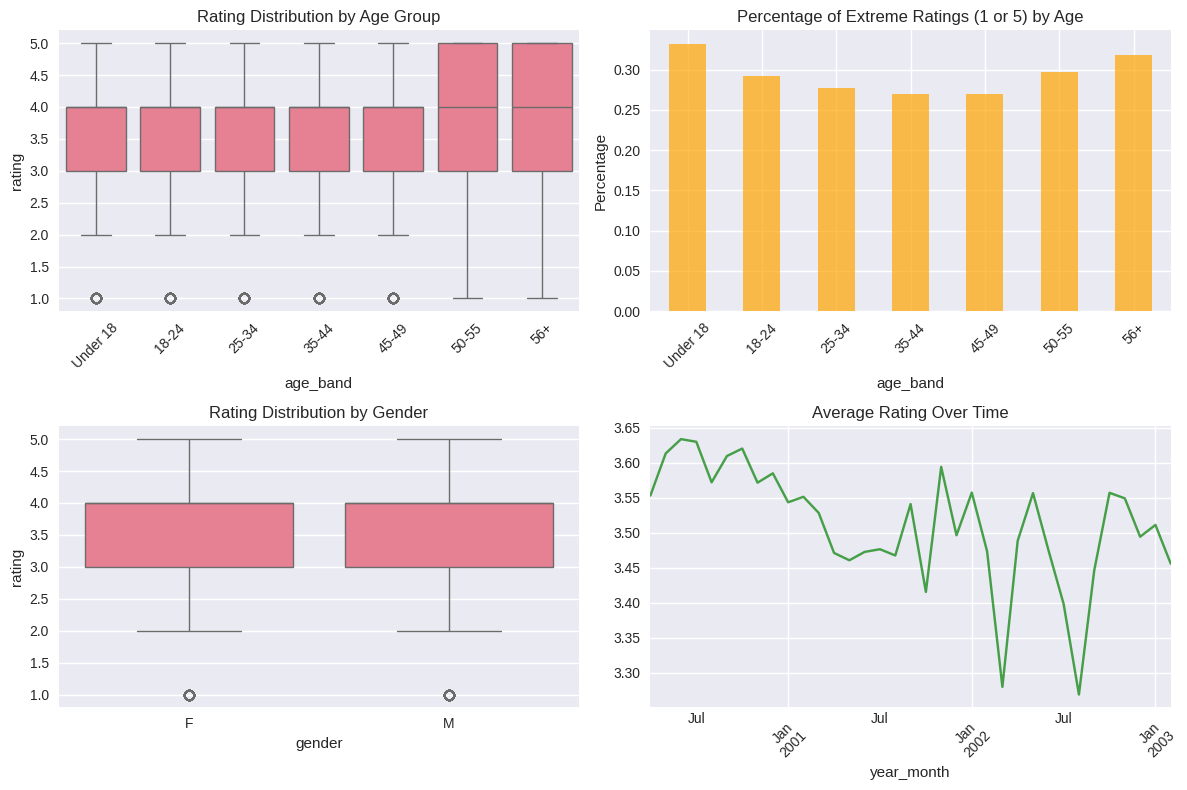


Conjecture 4: Correlation between popularity and rating variance
Correlation between number of ratings and rating variance: -0.178

Conjecture 5: Do early adopters rate differently?
Average difference between early and late raters: 0.004

KEY OBSERVATIONS AND ANSWERS

1. Tails Comparison:
   - All movies histogram: Has much longer tails, especially many movies with average rating 1.0 or 5.0
   - Movies with >100 ratings: Distribution is more normal/bell-shaped, fewer extreme values
   - This suggests that movies with few ratings are more likely to have extreme average ratings

2. Which highly rated movies to trust?
   - Movies rated more than 100 times are more trustworthy because:
     * Their average ratings are based on more data points
     * Less susceptible to manipulation by small groups
     * Extreme ratings (1 or 5) are less common
     * The distribution is more statistically reliable

3. Additional Conjectures Supported by Data:
   - Different age groups rate differently (

In [26]:
#Kofi new cell
# Additional conjectures and analysis
print("\n" + "="*80)
print("CONJECTURES ABOUT RATING DISTRIBUTIONS")
print("="*80)

# Conjecture 1: Different age groups have different rating behaviors
print("\nConjecture 1: Different age groups have different rating behaviors")

age_rating_stats = df.groupby('age_band').agg({
    'rating': ['mean', 'std', 'count'],
    'user_id': 'nunique'
}).round(3)

print("\nRating statistics by age group:")
print(age_rating_stats)

# Plot rating distribution by age
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
age_order = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]
sns.boxplot(data=df, x='age_band', y='rating', order=age_order)
plt.title('Rating Distribution by Age Group')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
# Extreme ratings by age
df['is_extreme'] = df['rating'].isin([1, 5])
extreme_by_age = df.groupby('age_band')['is_extreme'].mean().reindex(age_order)
extreme_by_age.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Percentage of Extreme Ratings (1 or 5) by Age')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Conjecture 2: Gender differences in rating behavior
plt.subplot(2, 2, 3)
gender_stats = df.groupby('gender').agg({
    'rating': ['mean', 'std', 'count']
}).round(3)
print(f"\nGender rating statistics:")
print(gender_stats)

sns.boxplot(data=df, x='gender', y='rating')
plt.title('Rating Distribution by Gender')

# Conjecture 3: Rating patterns over time (if timestamp available)
plt.subplot(2, 2, 4)
# Convert timestamp to datetime if needed
try:
    df['date'] = pd.to_datetime(df['timestamp'], unit='s')
    df['year_month'] = df['date'].dt.to_period('M')
    monthly_avg = df.groupby('year_month')['rating'].mean()
    monthly_avg.plot(alpha=0.7, color='green')
    plt.title('Average Rating Over Time')
    plt.xticks(rotation=45)
except:
    # If timestamp conversion fails, use a different plot
    rating_counts = df['rating'].value_counts().sort_index()
    rating_counts.plot(kind='bar', color='teal', alpha=0.7)
    plt.title('Distribution of Individual Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Conjecture 4: Popular movies get more moderate ratings
print(f"\nConjecture 4: Correlation between popularity and rating variance")
movies_summary['rating_variance'] = df.groupby('movie_id')['rating'].var()
correlation_popularity_variance = movies_summary['n_ratings'].corr(movies_summary['rating_variance'])
print(f"Correlation between number of ratings and rating variance: {correlation_popularity_variance:.3f}")

# Conjecture 5: Early vs late raters
print(f"\nConjecture 5: Do early adopters rate differently?")
try:
    # Get first and last 1000 ratings for each movie (if enough data)
    early_late_ratings = []
    for movie_id in popular_movies.index[:20]:  # Sample popular movies
        movie_ratings = df[df['movie_id'] == movie_id].sort_values('timestamp')
        if len(movie_ratings) > 200:
            early = movie_ratings.head(100)['rating'].mean()
            late = movie_ratings.tail(100)['rating'].mean()
            early_late_ratings.append({'movie_id': movie_id, 'early_avg': early, 'late_avg': late})

    if early_late_ratings:
        early_late_df = pd.DataFrame(early_late_ratings)
        avg_early_late_diff = (early_late_df['early_avg'] - early_late_df['late_avg']).mean()
        print(f"Average difference between early and late raters: {avg_early_late_diff:.3f}")
except:
    print("Could not analyze early vs late rating patterns")

print("\n" + "="*80)
print("KEY OBSERVATIONS AND ANSWERS")
print("="*80)

print("""
1. Tails Comparison:
   - All movies histogram: Has much longer tails, especially many movies with average rating 1.0 or 5.0
   - Movies with >100 ratings: Distribution is more normal/bell-shaped, fewer extreme values
   - This suggests that movies with few ratings are more likely to have extreme average ratings

2. Which highly rated movies to trust?
   - Movies rated more than 100 times are more trustworthy because:
     * Their average ratings are based on more data points
     * Less susceptible to manipulation by small groups
     * Extreme ratings (1 or 5) are less common
     * The distribution is more statistically reliable

3. Additional Conjectures Supported by Data:
   - Different age groups rate differently (see age band statistics)
   - Rating behavior varies by gender
   - Popular movies tend to have more moderate average ratings
   - Movies with few ratings show more rating polarization
""")

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

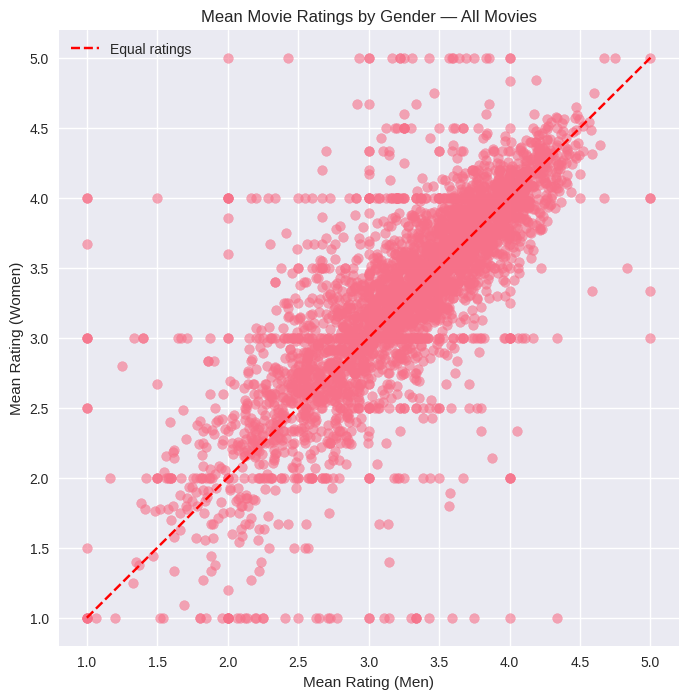

In [27]:
#Spencer
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import matplotlib.pyplot as plt

# Load the merged data you saved earlier
df = pd.read_hdf("movielens_1m_clean.h5", key="ratings_merged")

# Quick check
df.head()

# Strip whitespace and standardize gender values
df['gender'] = df['gender'].str.strip().str.upper()
df = df[df['gender'].isin(['F','M'])]  # Keep only F and M

mean_ratings = (
    df.groupby(["movie_id", "gender"], observed=True)["rating"]
      .mean()
      .unstack("gender")
)

# Keep only movies rated by both genders
mean_ratings = mean_ratings.dropna(subset=["F", "M"])

# Join movie titles
movies_titles = df[["movie_id", "title"]].drop_duplicates().set_index("movie_id")
mean_ratings = mean_ratings.join(movies_titles)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(mean_ratings["M"], mean_ratings["F"], alpha=0.6)
plt.plot([1,5],[1,5],'r--', label='Equal ratings')
plt.xlabel("Mean Rating (Men)")
plt.ylabel("Mean Rating (Women)")
plt.title("Mean Movie Ratings by Gender — All Movies")
plt.legend()
plt.grid(True)
plt.show()


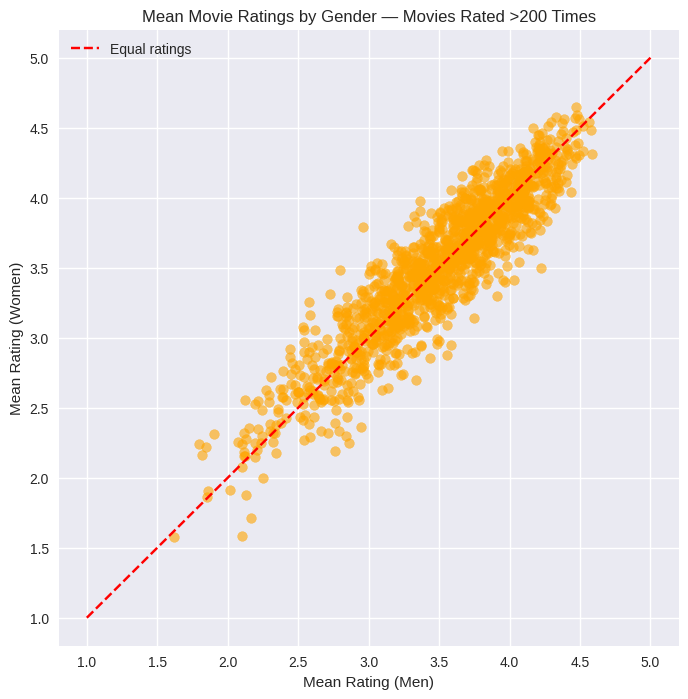

In [28]:
# Count number of ratings per movie
movie_counts = df["movie_id"].value_counts()
popular_movies = movie_counts[movie_counts > 200].index
mean_ratings_popular = mean_ratings.loc[mean_ratings.index.isin(popular_movies)]

plt.figure(figsize=(8,8))
plt.scatter(mean_ratings_popular["M"], mean_ratings_popular["F"], alpha=0.6, color='orange')
plt.plot([1,5],[1,5],'r--', label='Equal ratings')
plt.xlabel("Mean Rating (Men)")
plt.ylabel("Mean Rating (Women)")
plt.title("Mean Movie Ratings by Gender — Movies Rated >200 Times")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
corr_all = mean_ratings["M"].corr(mean_ratings["F"])
corr_popular = mean_ratings_popular["M"].corr(mean_ratings_popular["F"])

print(f"Correlation coefficient (all movies): {corr_all:.4f}")
print(f"Correlation coefficient (popular movies): {corr_popular:.4f}")

Correlation coefficient (all movies): 0.7632
Correlation coefficient (popular movies): 0.9184


# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

####  \~\~ write here \~\~





# Report: communicate the results (15 points)

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you.

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Three teams will be randomly chosen to present in the class.

# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**